In [27]:
# Print your Emory ID here
print("Emory ID: 12345678")

Emory ID: 12345678


In [28]:
# Import the necessary libraries and load the data

import pandas as pd
df = pd.read_csv("passwords.csv")

1. An online password attack is when someone tries to hack your account by simply trying a very large number of username/password combinations to access your account. For each `password` in our dataset, the `value` column shows the amount of time it is estimated to take an “online password attack” to hack your account. The column `time_unit` shows the units of that time value (e.g., hours, days, years, etc.). It would be much nicer if our values were of the same units so we can more easily compare the “online password guessing time” for each password. So your first task is to convert all of the values to units of hours (assume the conversion units provided below, e.g., 1 day is 24 hours, 1 week is 168 hours, etc).

In [31]:
# Your answer here 

units = {
    "seconds": 1 / 3600,
    "minutes": 1 / 60,
    "hours": 1,
    "days": 24,
    "weeks": 168,
    "months": 720,
    "years": 8760,
}
# Convert all values to hours for easier comparison
def convert_to_hours(row):
    if pd.notna(row['value']) and pd.notna(row['time_unit']):
        return row['value'] * units[row['time_unit']]
    return None

df.loc[:, 'value_in_hours'] = df.apply(convert_to_hours, axis=1)
df.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,value_in_hours
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0,60531.600000
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0,0.308667
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0,30.960000
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0,0.003086
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0,89.280000


2. Are there any missing values in the dataset? If so, how many? After you have counted the, please drop them from the dataset.

In [32]:
# Your answer here
# Count the missing values
missing_values_count = df.isna().sum()
print("Missing values in each column:\n", missing_values_count)

# Drop the rows with missing values
df.dropna(inplace=True)

Missing values in each column:
 rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
value_in_hours       7
dtype: int64


3. Which password category has the highest average strength?


In [40]:
# Your answer here
df.groupby("category").mean(numeric_only=True)['strength'].idxmax()


'nerdy-pop'

4. What is the rank of the password 'qwerty'?

In [45]:
# Your answer here
rank = df[df["password"] == "qwerty"]["rank"]

print("the rank of password 'qwerty' is," + str(rank))



the rank of password 'qwerty' is,4    5.0
Name: rank, dtype: float64


5. How many passwords have more than 8 characters?

In [49]:
# Your answer here
len(df[df['password'].str.len() > 8])


1

6. How many passwords do not contain a number?

In [52]:
# Your answer here

len(df[~df['password'].str.contains(r'\d')])


446

7. What is the average time in hours needed to crack these passwords that begin with `123`? How does this compare to the average of all passwords in the dataset?

In [56]:
# Your answer here

# Calculate the average time in hours needed to crack passwords that begin with '123'
avg_time_123 = df[df['password'].str.startswith('123')]['value_in_hours'].mean()

# Calculate the average time in hours needed to crack all passwords in the dataset
avg_time_all = df['value_in_hours'].mean()

print(f"Average time to crack passwords starting with '123': {avg_time_123:.2f} hours")
print(f"Average time to crack all passwords: {avg_time_all:.2f} hours")

Average time to crack passwords starting with '123': 107.30 hours
Average time to crack all passwords: 13917.57 hours


8. What percentage of passwords are of the `simple-alphanumeric` category?

In [54]:
# Your answer here
simple_alphanumeric_count = len(df[df['category'] == 'simple-alphanumeric'])
total_passwords = len(df)
percentage_simple_alphanumeric = (simple_alphanumeric_count / total_passwords) * 100

print(f"Percentage of passwords in the 'simple-alphanumeric' category: {percentage_simple_alphanumeric:.2f}%")

Percentage of passwords in the 'simple-alphanumeric' category: 12.20%


9. How many passwords have a strength rating below 5? What is their percentage?

In [62]:
# Your answer here

weak_passwords = len(df[df['strength'] < 5])

print(f"Percentage of passwords with a strength of less than 5: {(weak_passwords/total_passwords * 100):.2f}%")

Percentage of passwords with a strength of less than 5: 14.60%


10. What is the most common password in the dataset?

In [87]:
# Your answer here

most_common_passwords = df['password'].value_counts().sort_values(ascending=False)

print(most_common_passwords)
print("Each password occurs 1 time")


password
password    1
shadow      1
12345678    1
1234        1
qwerty      1
           ..
college     1
jester      1
vampire     1
nirvana     1
passw0rd    1
Name: count, Length: 500, dtype: int64
Each password occurs 1 time


11. How many unique passwords are there in each category, and what is their average length?

In [89]:
# Your answer here
unique_passwords_per_category = df.groupby('category')['password'].nunique()
average_length_per_category = df.groupby('category')['password'].apply(lambda x: x.str.len().mean())

print("Unique passwords per category:\n", unique_passwords_per_category)
print("\nAverage length of passwords per category:\n", average_length_per_category)

Unique passwords per category:
 category
animal                  29
cool-macho              79
fluffy                  44
food                    11
name                   183
nerdy-pop               30
password-related        15
rebellious-rude         11
simple-alphanumeric     61
sport                   37
Name: password, dtype: int64

Average length of passwords per category:
 category
animal                 6.206897
cool-macho             6.253165
fluffy                 5.795455
food                   6.090909
name                   6.218579
nerdy-pop              6.633333
password-related       6.333333
rebellious-rude        6.363636
simple-alphanumeric    5.934426
sport                  6.513514
Name: password, dtype: float64


12. What is the median rank and strength for passwords of each length?

In [90]:
# Your answer here

median_rank_strength = df.groupby(df['password'].str.len()).agg({'rank': 'median', 'strength': 'median'})

print("Median rank and strength for passwords of each length:\n", median_rank_strength)

Median rank and strength for passwords of each length:
            rank  strength
password                 
4         326.0       6.0
5         343.0       7.0
6         231.0       7.0
7         222.0       8.0
8         286.0       8.0
9          49.0       4.0


13. Add a column `strength_label` with values `weak` if strength is below 5, else `strong`. Use a lambda function.

In [93]:
# Your answer here

df['strength_label'] = df['strength'].apply(lambda x: 'weak' if x < 5 else 'strong')
df.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,value_in_hours,strength_label
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0,60531.600000,strong
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0,0.308667,weak
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0,30.960000,weak
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0,0.003086,weak
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0,89.280000,strong


14. Create a column `high_value` with a value of `True` if value is in the top 10% of values in the dataset.

In [95]:
# Your answer here

# Calculate the threshold for the top 10% of values
threshold = df['value'].quantile(0.90)

# Create the 'high_value' column
df['high_value'] = df['value'] >= threshold
df.head()

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,value_in_hours,strength_label,high_value
0,1.0,password,password-related,6.91,years,2.170000e+00,1.0,8.0,11.0,60531.600000,strong,False
1,2.0,123456,simple-alphanumeric,18.52,minutes,1.110000e-05,2.0,4.0,8.0,0.308667,weak,True
2,3.0,12345678,simple-alphanumeric,1.29,days,1.110000e-03,3.0,4.0,8.0,30.960000,weak,False
3,4.0,1234,simple-alphanumeric,11.11,seconds,1.110000e-07,4.0,4.0,8.0,0.003086,weak,True
4,5.0,qwerty,simple-alphanumeric,3.72,days,3.210000e-03,5.0,8.0,11.0,89.280000,strong,False


15. Join all passwords within each `category` into a single string.

In [97]:
# Your answer here
passwords_joined = df.groupby('category')['password'].apply(lambda x: ' '.join(x))

print(passwords_joined)

category
animal                 dragon monkey bigdog falcon phoenix tigers chi...
cool-macho             mustang shadow master harley hunter ranger bus...
fluffy                 love sunshine silver orange ginger summer prin...
food                   pepper cheese coffee banana butter muffin hotd...
name                   michael jennifer jordan superman thomas tigger...
nerdy-pop              starwars computer merlin matrix snoopy boomer ...
password-related       password letmein test pass access gateway plea...
rebellious-rude        biteme freedom secret whatever badboy sexsex b...
simple-alphanumeric    123456 12345678 1234 qwerty 12345 696969 abc12...
sport                  baseball football soccer hockey dallas yankees...
Name: password, dtype: object


**Bonus question 01**: What is the correlation between password length and strength? Create a scatter plot with regression line.

Correlation between password length and strength: 0.26


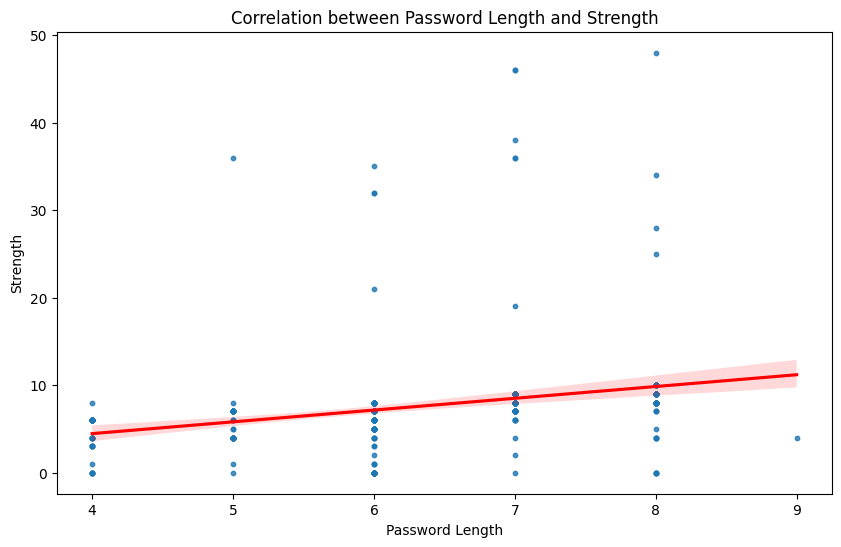

In [100]:
import seaborn as sns

# Your answer here

import matplotlib.pyplot as plt

# Calculate the correlation
correlation = df['password'].str.len().corr(df['strength'])
print(f"Correlation between password length and strength: {correlation:.2f}")

# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=df['password'].str.len(), y=df['strength'], scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Password Length')
plt.ylabel('Strength')
plt.title('Correlation between Password Length and Strength')
plt.show()

**Bonus question 02**: Find all passwords with palindromes.

In [94]:
# Your answer here

def is_palindrome(s):
    if len(s) <= 1:
        return True
    if s[0] != s[-1]:
        return False
    return is_palindrome(s[1:-1])

palindromic_passwords = df[df['password'].apply(is_palindrome)]
palindromic_passwords

,rank,password,category,value,time_unit,offline_crack_sec,rank_alt,strength,font_size,value_in_hours,strength_label
18,19.0,111111,simple-alphanumeric,18.52,minutes,1.110000e-05,19.0,0.0,0.0,0.308667,weak
59,60.0,666666,simple-alphanumeric,18.52,minutes,1.110000e-05,60.0,0.0,0.0,0.308667,weak
76,77.0,1111,simple-alphanumeric,11.11,seconds,1.110000e-07,77.0,0.0,0.0,0.003086,weak
105,106.0,aaaaaa,simple-alphanumeric,3.72,days,3.210000e-03,106.0,0.0,0.0,89.280000,weak
144,145.0,xxxxxx,simple-alphanumeric,3.72,days,3.210000e-03,145.0,0.0,0.0,89.280000,weak
190,191.0,hannah,name,3.72,days,3.210000e-03,192.0,0.0,0.0,89.280000,weak
192,193.0,11111111,simple-alphanumeric,1.29,days,1.110000e-03,194.0,0.0,0.0,30.960000,weak
206,207.0,7777777,simple-alphanumeric,3.09,hours,1.110000e-04,208.0,0.0,0.0,3.090000,weak
277,278.0,222222,simple-alphanumeric,18.52,minutes,1.110000e-05,279.0,0.0,0.0,0.308667,weak
285,286.0,xxxxxxxx,simple-alphanumeric,6.91,years,2.170000e+00,287.0,0.0,0.0,60531.600000,weak
